# Loading modules
This assumes OnionRings has been properly installed in your environment (see Readme.md for instruction)
The module is called onion_rings

In [1]:
count_dict = {'indian': 368,
 'female': 283,
 'male': 280,
 'american': 269,
 'tall': 238,
 'south': 230,
 'asian': 199,
 'adult': 197,
 'hindu': 196,
 'muslim': 195,
 'white': 195,
 'christian': 194,
 'teenager': 189,
 'jew': 188,
 'child': 187,
 'buddhist': 184,
 'short': 181,
 'black': 173,
 'pierced': 168,
 'latino': 164,
 'muscular': 158,
 'obese': 157,
 'old': 153,
 'middle': 149,
 'skinny': 141,
 'handicapped': 135,
 'down': 132,
 'blind': 99}

In [5]:
count_dict_main = {}
for k, v in count_dict.items():
    count_dict_main[k.title()] = v

for k, v in sorted(count_dict_main.items()):
    print(f"{k}: {v}")

Adult: 197
American: 269
Asian: 199
Black: 173
Blind: 99
Buddhist: 184
Child: 187
Christian: 194
Down: 132
Female: 283
Handicapped: 135
Hindu: 196
Indian: 368
Jew: 188
Latino: 164
Male: 280
Middle: 149
Muscular: 158
Muslim: 195
Obese: 157
Old: 153
Pierced: 168
Short: 181
Skinny: 141
South: 230
Tall: 238
Teenager: 189
White: 195


In [22]:
main_dict = {
    "Age": {"Child": 187, "Old": 153, "Teenager": 189, "Adult": 197},
    "Disability": {"Blind": 99, "Handicapped": 135, "Down": 132},
    "Gender": {"Male": 280, "Female": 283},
    "Nationality": {"American": 269, "Indian": 368},
    "Physical\nAppearance": {
        "Short": 181, "Obese": 157, "Skinny": 141,
        "Tall": 238, "Pierced": 168, "Muscular": 158
    },
    "Race/Color": {
        "White": 195, "Black": 173, "Asian": 199, 
        "South": 181, "Latino": 164, "Middle": 149
    },
    "Religion": {
        "Buddhist": 184, "Christian": 194, "Hindu": 196,
        "Jew": 188, "Muslim": 195
    }
}

In [8]:
count = 0
for k, v in main_dict.items():
    count += len(main_dict[k])

count

28

[[np.float64(0.9019607843137255), np.float64(0.6705882352941176), np.float64(0.00784313725490196), np.float64(1.0)], [np.float64(0.10588235294117647), np.float64(0.6196078431372549), np.float64(0.4666666666666667), np.float64(1.0)], [np.float64(0.4), np.float64(0.6509803921568628), np.float64(0.11764705882352941), np.float64(1.0)], [np.float64(0.4), np.float64(0.4), np.float64(0.4), np.float64(1.0)], [np.float64(0.4588235294117647), np.float64(0.4392156862745098), np.float64(0.7019607843137254), np.float64(1.0)], [np.float64(0.10588235294117647), np.float64(0.6196078431372549), np.float64(0.4666666666666667), np.float64(1.0)], [np.float64(0.6509803921568628), np.float64(0.4627450980392157), np.float64(0.11372549019607843), np.float64(1.0)], [np.float64(0.9058823529411765), np.float64(0.1607843137254902), np.float64(0.5411764705882353), np.float64(1.0)], [np.float64(0.8509803921568627), np.float64(0.37254901960784315), np.float64(0.00784313725490196), np.float64(1.0)]]


(<Figure size 1000x1000 with 1 Axes>, <PolarAxes: >)

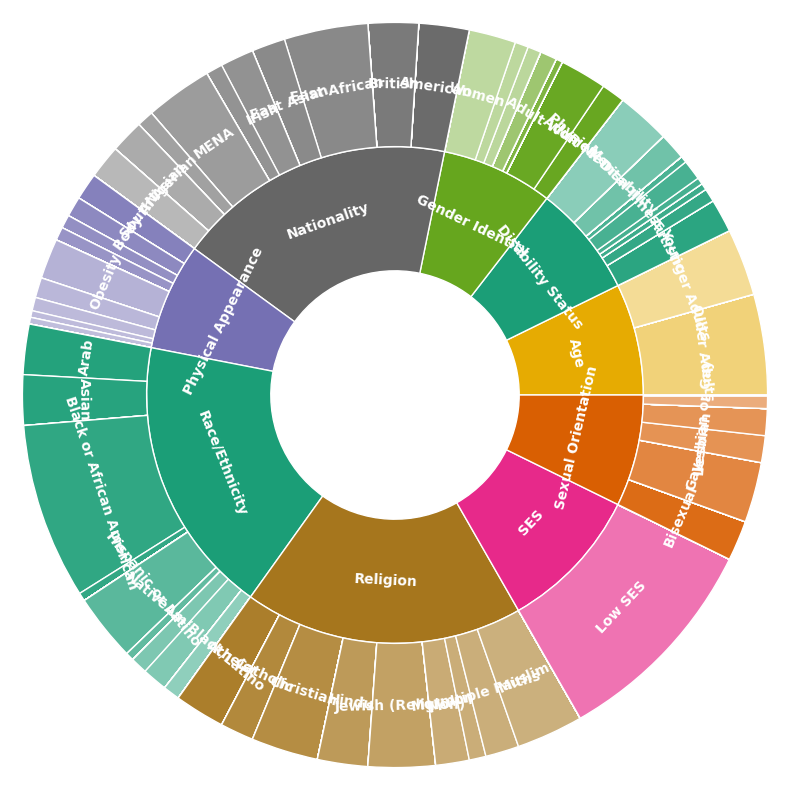

In [16]:
import pandas as pd
# from onion_rings.onion_rings import plot_onion_rings
from onion_rings import plot_onion_rings
import numpy as np
from matplotlib import pyplot as plt


def pandas_to_onion(df,slices,slicelabels=None):
    """
    Converts a pandas dataframe to a format that can be used by the plot_onion_rings function
    :param df: dataframe to be converted
    :param slices: Ordered list of columns to be used as slices
    :param slicelabels: Optional list of lists of labels to be used for each slice. If not provided, the unique values of each slice will be used
    :return: a tuple containing the counts and the labels
    """

    df2=df.astype({slice:'category' for slice in slices}) #converts to category type all the slices
    counts=df2.groupby(slices,observed=False)
    csize=counts.size()
    if slicelabels is None: #if no labels are provided, the unique values of each slice will be used
        slicelabels=[]
        for i in range(len(slices)):
            slicelabels.append(list(csize.index.get_level_values(i).categories))
    shape=tuple([len(l) for l in slicelabels])
    counts=np.array(counts.size().tolist()).reshape(shape) #converts the counts to a numpy array
    return (counts,slicelabels)


def plot_onion_rings(data,labels,shortlabels=None, basecolormap="Dark2",plot_threshold = 0.02,fontsize=7,figsize=(10,10),rel_percent=False):

    if type(data) == pd.core.frame.DataFrame: #if the data is a pandas dataframe, it is first converted to the appropriate format
        onion_data=pandas_to_onion(data,labels, slicelabels=shortlabels)
        data=onion_data[0]
        labels=onion_data[1]

    basemap = plt.colormaps[basecolormap] #loads base colormap
    NUMBER_BASE = basemap.N # number of lements in the colormap

    data_array = np.array(data) # converts data in numpy array form
    NUMBER_ITEMS_PER_LEVEL = np.array(np.shape(data_array)) # number of nodes at each level of the tree
    NUMBER_LEVELS = NUMBER_ITEMS_PER_LEVEL.size # number of levels

    # Creation of colors to be used at each level of the onion ring
    # Each nesting levels decreases the alpha
    my_map = []

    for i in np.arange(NUMBER_ITEMS_PER_LEVEL[0]):
        my_map.append(list(basemap(np.mod(i,NUMBER_BASE)))) # adds base colors to the map, cycling if necessary

    import random
    random.shuffle(my_map)
    print(my_map)

    
    alpha_range = [[1.0,0.4]] # range of alpha to split in the new colormap
    low_alpha_range = alpha_range[0][1] # lowest end of alphas to use ()

    alpha_per_level = [[1]] # initialization of list of alphas per level

    for level in np.arange(1,NUMBER_LEVELS): # creating list of alphas per level
        nb_items = NUMBER_ITEMS_PER_LEVEL[level]
        level_alpha = []
        for i in np.arange(0,len(alpha_range[level-1])):
            # The following splits the range of alphas at the previous level in the appropriate number of items
            if alpha_range[level-1][i] >low_alpha_range:
                delta = (alpha_range[level-1][i]-alpha_range[level-1][i+1])/(nb_items+1)
                new_alphas = list(alpha_range[level-1][i] - delta*np.arange(1,nb_items+2))
                alpha_range.append(new_alphas)
                for new_alpha in new_alphas[0:-1]:
                    level_alpha.append(new_alpha)
        alpha_per_level.append(level_alpha)

    # Creation of color map
    my_level_map = []
    NUMBER_CUM_ITEMS_PER_LEVEL = np.cumprod(NUMBER_ITEMS_PER_LEVEL)/NUMBER_ITEMS_PER_LEVEL[0] # Computes the indexing in the colormap

    for level in np.arange(NUMBER_LEVELS):
        for base_color in my_map:
            if level==0:
                my_level_map.append(base_color) # appends base colors to first level
            else:
                for item in np.arange(int(NUMBER_CUM_ITEMS_PER_LEVEL[level])): # adds modified alphas to the color map using alpha_per_level
                    new_color = base_color[0:3]
                    alpha = alpha_per_level[level][item]
                    new_color.append(alpha)
                    my_level_map.append(new_color)


    # Creation of polar plot to represent data
    # Credit where it's due: https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

    fig, ax = plt.subplots(subplot_kw=dict(projection="polar"), figsize=figsize) # figure and axes
    SIZE = 1.0/(NUMBER_LEVELS+1) # width of onion ring (using +1 leaves a nice hold in the middle)

    values_normalized = data_array/np.sum(data_array) # Normalize data_array values to [0,1]
    values_in_angles = values_normalized*2*np.pi # Normalize data_array values to [0,2pi]

    # Computes boundaries and values of different levels
    # This is merely data re-formatting to ensure that we can read all required value sequentially in a list per level
    width_values_at_level = []
    original_values_at_level = []
    percent_values_at_level = []
    rel_percent_values_at_level = []
    edge_values_at_level = []

    for level in np.arange(NUMBER_LEVELS-1,-1,-1):
        if level == NUMBER_LEVELS-1:
            hierachical_values_in_angle = values_in_angles
            hierarchical_original_values = data_array
            hierarchical_percent_values = values_normalized
            outersums=np.expand_dims(np.sum(data_array,axis=-1),axis=-1)
            hierarchical_rel_percent_values = data_array/outersums
            #hierarchical_percent_values = data_array/outersums #Temporary test
        else:
            hierachical_values_in_angle = hierachical_values_in_angle.sum(axis=level+1)
            hierarchical_original_values = hierarchical_original_values.sum(axis=level+1)
            hierarchical_percent_values = hierarchical_percent_values.sum(axis=level+1)
            data_array_temp=np.sum(data_array,axis=tuple(range(level+1,NUMBER_LEVELS)))
            outersums_temp=np.expand_dims(np.sum(data_array_temp,axis=-1),axis=-1)
            hierarchical_rel_percent_values = data_array_temp/outersums_temp
            #hierarchical_percent_values = data_array_temp/outersums_temp #Temporary test
        edge_values_at_level.insert(0,np.cumsum(np.append(0, hierachical_values_in_angle.flatten()[:-1])))
        width_values_at_level.insert(0,hierachical_values_in_angle.flatten())
        original_values_at_level.insert(0,hierarchical_original_values.flatten())
        rel_percent_values_at_level.insert(0,hierarchical_rel_percent_values.flatten())
        percent_values_at_level.insert(0,hierarchical_percent_values.flatten())

    # Plots layers of the onion
    for level in np.arange(NUMBER_LEVELS):
        # Extracts the colormap for the level
        if level ==0 :
            start_color_index = 0
            stop_color_index = start_color_index + NUMBER_ITEMS_PER_LEVEL[level]
        else:
            start_color_index = stop_color_index
            stop_color_index  = start_color_index + np.prod(np.array(NUMBER_ITEMS_PER_LEVEL)[0:level+1])
        colors_level = my_level_map[start_color_index:stop_color_index]
        # Plots the layer
        ax.bar(x=edge_values_at_level[level],
               width=width_values_at_level[level],
               bottom=2*SIZE+level*2*SIZE,
               height=2*SIZE,
               color=colors_level,
               edgecolor='w',
               linewidth=1,
               align="edge")

        # Prints labels
        region_edges = edge_values_at_level[level]
        for i in np.arange(len(region_edges)):
            if i< len(region_edges)-1:
                angle = (region_edges[i]+region_edges[i+1])*0.5
            else:
                angle = (region_edges[len(region_edges)-1]+2*np.pi)*0.5
            if angle>np.pi:
                text_rotation=0
            else:
                text_rotation = angle+180
            if percent_values_at_level[level][i]>plot_threshold:
                if rel_percent:
                    # current_label = labels[level][np.mod(i,NUMBER_ITEMS_PER_LEVEL[level])] + "\n"+str(np.round(rel_percent_values_at_level[level][i]*100,1))+"%\n({})".format(original_values_at_level[level][i])
                    current_label = labels[level][np.mod(i,NUMBER_ITEMS_PER_LEVEL[level])] 
                else:
                    current_label = labels[level][np.mod(i,NUMBER_ITEMS_PER_LEVEL[level])] 
                    # + "\n"+str(np.round(percent_values_at_level[level][i]*100,1))+"%\n({})".format(original_values_at_level[level][i])
                plt.text(angle,3*SIZE+level*2*SIZE,current_label,size=fontsize  ,ha='center',va='center',color='white',weight='bold',rotation=text_rotation, rotation_mode='anchor',transform_rotates_text=True)
                

    ax.set_axis_off()

    return(fig,ax)


import pandas as pd
import numpy as np
# from onion_rings.onion_rings import plot_onion_rings

# Define the categories and subcategories with their respective sample counts
category_distribution = {
    "Age": {"Older Adults": 300, "Younger Adults": 200},
    "Disability Status": {
        "Autistic": 100, "Blind or Low Vision": 40, "Cerebral Palsy": 20, 
        "Cognitive Disability": 20, "Deaf or hard of hearing": 60, 
        "Down Syndrome": 20, "Mental Illness": 80, "Physical Disability": 160
    },
    "Gender Identity": {
        "Adult Men": 70, "Adult Women": 140, "Child Girls": 20, 
        "Men": 50, "Trans (all genders)": 40, "Trans Women": 40, "Women": 140
    },
    "Nationality": {
        "American": 150, "British": 150, "East African": 250, "East Asian": 100,
        "Irish": 100, "Italian": 50, "MENA": 200, "Mixed Asian": 50, 
        "Nigerian": 100, "South Asian": 100
    },
    "Physical Appearance": {
        "Body Art": 80, "Clothing": 60, "Dwarfism": 40, "Hairstyle": 40, 
        "Obesity": 120, "Pregnancy": 60, "Short Stature": 40, "Skin Appearance": 20, 
        "Strabismus": 20
    },
    "Race/Ethnicity": {
        "Arab": 150, "Asian": 150, "Black or African American": 525, 
        "Black/Hispanic/Latino": 25, "Hispanic or Latino": 200, 
        "Jewish (Ethnicity)": 25, "Native American": 50, 
        "NativeAm/Black/Latino": 75, "Roma": 50
    },
    "Religion": {
        "Atheist": 150, "Catholic": 100, "Christian": 200, "Hindu": 150, 
        "Jewish (Religion)": 200, "Mormon and Christian": 50, "Mormon": 100, 
        "Multiple Faiths": 100, "Muslim": 200
    },
    "SES": {"Low SES": 650},
    "Sexual Orientation": {
        "Bisexual": 120, "Gay": 180, "Lesbian or Gay": 80, 
        "Lesbian": 80, "Pansexual": 40
    }
}

# Generate the dataset
data = []
for category, subcategories in category_distribution.items():
    for subcategory, count in subcategories.items():
        data.extend([(category, subcategory)] * count)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Category", "Subcategory"])

# Plot using onion_rings
plot_onion_rings(df, ['Category', 'Subcategory'], plot_threshold=0.01, basecolormap="Dark2", fontsize=10, rel_percent=True)

# plt.savefig("ExampleOnionRing.png", bbox_inches='tight', pad_inches=1, dpi=300)

In [12]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 449.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 675.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 449.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 999.8 kB/s eta 0:00:00:0100:010m


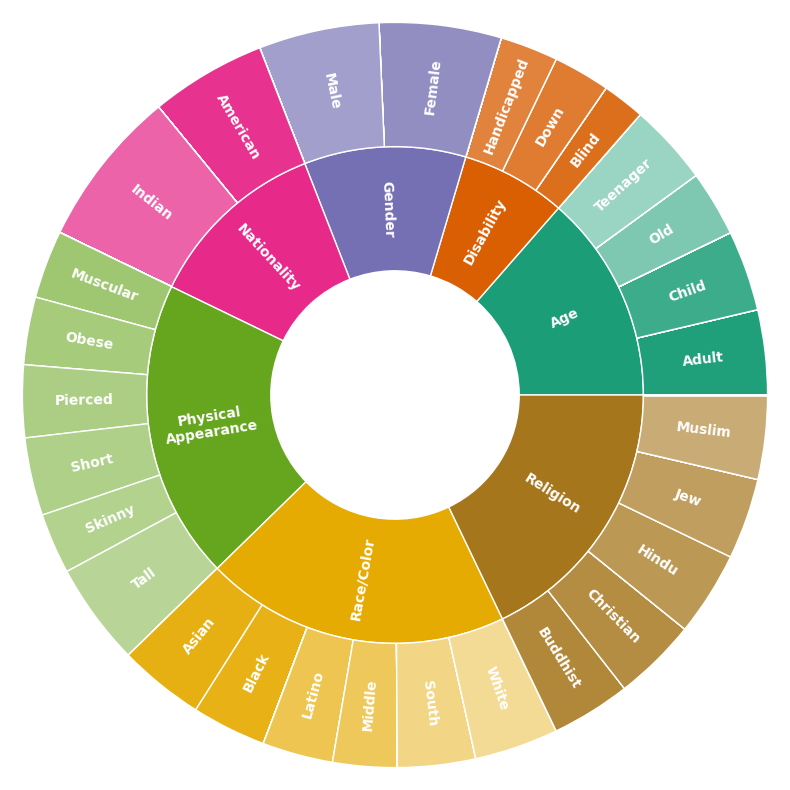

In [ ]:
import pandas as pd
# from onion_rings.onion_rings import plot_onion_rings
from onion_rings import plot_onion_rings
import numpy as np
from matplotlib import pyplot as plt


def pandas_to_onion(df,slices,slicelabels=None):
    """
    Converts a pandas dataframe to a format that can be used by the plot_onion_rings function
    :param df: dataframe to be converted
    :param slices: Ordered list of columns to be used as slices
    :param slicelabels: Optional list of lists of labels to be used for each slice. If not provided, the unique values of each slice will be used
    :return: a tuple containing the counts and the labels
    """

    df2=df.astype({slice:'category' for slice in slices}) #converts to category type all the slices
    counts=df2.groupby(slices,observed=False)
    csize=counts.size()
    if slicelabels is None: #if no labels are provided, the unique values of each slice will be used
        slicelabels=[]
        for i in range(len(slices)):
            slicelabels.append(list(csize.index.get_level_values(i).categories))
    shape=tuple([len(l) for l in slicelabels])
    counts=np.array(counts.size().tolist()).reshape(shape) #converts the counts to a numpy array
    return (counts,slicelabels)


def plot_onion_rings(data,labels,shortlabels=None, basecolormap="Dark2",plot_threshold = 0.02,fontsize=7,figsize=(10,10),rel_percent=False):

    if type(data) == pd.core.frame.DataFrame: #if the data is a pandas dataframe, it is first converted to the appropriate format
        onion_data=pandas_to_onion(data,labels, slicelabels=shortlabels)
        data=onion_data[0]
        labels=onion_data[1]

    basemap = plt.colormaps[basecolormap] #loads base colormap
    NUMBER_BASE = basemap.N # number of lements in the colormap

    my_map = []

    data_array = np.array(data) # converts data in numpy array form
    NUMBER_ITEMS_PER_LEVEL = np.array(np.shape(data_array)) # number of nodes at each level of the tree
    NUMBER_LEVELS = NUMBER_ITEMS_PER_LEVEL.size # number of levels

    # Creation of colors to be used at each level of the onion ring
    # Each nesting levels decreases the alpha
    my_map = []

    for i in np.arange(NUMBER_ITEMS_PER_LEVEL[0]):
        my_map.append(list(basemap(np.mod(i,NUMBER_BASE)))) # adds base colors to the map, cycling if necessary

    # import random
    # random.shuffle(my_map)
    # my_map = [[0.4, 0.4, 0.4, 1.0], [0.9019607843137255, 0.6705882352941176, 0.00784313725490196, 1.0], [0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0], [0.4588235294117647, 0.4392156862745098, 0.7019607843137254, 1.0], [0.4, 0.6509803921568628, 0.11764705882352941, 1.0], [0.9058823529411765, 0.1607843137254902, 0.5411764705882353, 1.0], [0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0], [0.8509803921568627, 0.37254901960784315, 0.00784313725490196, 1.0], [0.6509803921568628, 0.4627450980392157, 0.11372549019607843, 1.0]]


    
    alpha_range = [[1.0,0.4]] # range of alpha to split in the new colormap
    low_alpha_range = alpha_range[0][1] # lowest end of alphas to use ()

    alpha_per_level = [[1]] # initialization of list of alphas per level

    for level in np.arange(1,NUMBER_LEVELS): # creating list of alphas per level
        nb_items = NUMBER_ITEMS_PER_LEVEL[level]
        level_alpha = []
        for i in np.arange(0,len(alpha_range[level-1])):
            # The following splits the range of alphas at the previous level in the appropriate number of items
            if alpha_range[level-1][i] >low_alpha_range:
                delta = (alpha_range[level-1][i]-alpha_range[level-1][i+1])/(nb_items+1)
                new_alphas = list(alpha_range[level-1][i] - delta*np.arange(1,nb_items+2))
                alpha_range.append(new_alphas)
                for new_alpha in new_alphas[0:-1]:
                    level_alpha.append(new_alpha)
        alpha_per_level.append(level_alpha)

    # Creation of color map
    my_level_map = []
    NUMBER_CUM_ITEMS_PER_LEVEL = np.cumprod(NUMBER_ITEMS_PER_LEVEL)/NUMBER_ITEMS_PER_LEVEL[0] # Computes the indexing in the colormap

    for level in np.arange(NUMBER_LEVELS):
        for base_color in my_map:
            if level==0:
                my_level_map.append(base_color) # appends base colors to first level
            else:
                for item in np.arange(int(NUMBER_CUM_ITEMS_PER_LEVEL[level])): # adds modified alphas to the color map using alpha_per_level
                    new_color = base_color[0:3]
                    alpha = alpha_per_level[level][item]
                    new_color.append(alpha)
                    my_level_map.append(new_color)


    # Creation of polar plot to represent data
    # Credit where it's due: https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

    fig, ax = plt.subplots(subplot_kw=dict(projection="polar"), figsize=figsize) # figure and axes
    SIZE = 1.0/(NUMBER_LEVELS+1) # width of onion ring (using +1 leaves a nice hold in the middle)

    values_normalized = data_array/np.sum(data_array) # Normalize data_array values to [0,1]
    values_in_angles = values_normalized*2*np.pi # Normalize data_array values to [0,2pi]

    # Computes boundaries and values of different levels
    # This is merely data re-formatting to ensure that we can read all required value sequentially in a list per level
    width_values_at_level = []
    original_values_at_level = []
    percent_values_at_level = []
    rel_percent_values_at_level = []
    edge_values_at_level = []

    for level in np.arange(NUMBER_LEVELS-1,-1,-1):
        if level == NUMBER_LEVELS-1:
            hierachical_values_in_angle = values_in_angles
            hierarchical_original_values = data_array
            hierarchical_percent_values = values_normalized
            outersums=np.expand_dims(np.sum(data_array,axis=-1),axis=-1)
            hierarchical_rel_percent_values = data_array/outersums
            #hierarchical_percent_values = data_array/outersums #Temporary test
        else:
            hierachical_values_in_angle = hierachical_values_in_angle.sum(axis=level+1)
            hierarchical_original_values = hierarchical_original_values.sum(axis=level+1)
            hierarchical_percent_values = hierarchical_percent_values.sum(axis=level+1)
            data_array_temp=np.sum(data_array,axis=tuple(range(level+1,NUMBER_LEVELS)))
            outersums_temp=np.expand_dims(np.sum(data_array_temp,axis=-1),axis=-1)
            hierarchical_rel_percent_values = data_array_temp/outersums_temp
            #hierarchical_percent_values = data_array_temp/outersums_temp #Temporary test
        edge_values_at_level.insert(0,np.cumsum(np.append(0, hierachical_values_in_angle.flatten()[:-1])))
        width_values_at_level.insert(0,hierachical_values_in_angle.flatten())
        original_values_at_level.insert(0,hierarchical_original_values.flatten())
        rel_percent_values_at_level.insert(0,hierarchical_rel_percent_values.flatten())
        percent_values_at_level.insert(0,hierarchical_percent_values.flatten())

    # Plots layers of the onion
    for level in np.arange(NUMBER_LEVELS):
        # Extracts the colormap for the level
        if level ==0 :
            start_color_index = 0
            stop_color_index = start_color_index + NUMBER_ITEMS_PER_LEVEL[level]
        else:
            start_color_index = stop_color_index
            stop_color_index  = start_color_index + np.prod(np.array(NUMBER_ITEMS_PER_LEVEL)[0:level+1])
        colors_level = my_level_map[start_color_index:stop_color_index]
        # Plots the layer
        ax.bar(x=edge_values_at_level[level],
               width=width_values_at_level[level],
               bottom=2*SIZE+level*2*SIZE,
               height=2*SIZE,
               color=colors_level,
               edgecolor='w',
               linewidth=1,
               align="edge")

        # Prints labels
        region_edges = edge_values_at_level[level]
        for i in np.arange(len(region_edges)):
            if i < len(region_edges) - 1:
                angle = (region_edges[i] + region_edges[i + 1]) * 0.5
            else:
                angle = (region_edges[-1] + 2 * np.pi) * 0.5

            angle_deg = np.degrees(angle)

            # Compute text alignment and upright rotation
            if 90 < angle_deg < 270:
                rotation = angle_deg + 180  # Flip upside-down text
                alignment = 'center'
            else:
                rotation = angle_deg
                alignment = 'center'

            if percent_values_at_level[level][i] > plot_threshold:
                current_label = labels[level][np.mod(i, NUMBER_ITEMS_PER_LEVEL[level])]

                ax.text(angle,
                        3 * SIZE + level * 2 * SIZE,
                        current_label,
                        size=fontsize,
                        ha=alignment,
                        va='center',
                        rotation=rotation,
                        rotation_mode='anchor',
                        transform_rotates_text=False,
                        color='white',
                        weight='bold')       

    ax.set_axis_off()

    return(fig,ax)


import pandas as pd
import numpy as np
# from onion_rings.onion_rings import plot_onion_rings

# Define the categories and subcategories with their respective sample counts
category_distribution = {
    "Age": {"Older Adults": 300, "Younger Adults": 200},
    "Disability Status": {
        "Autistic": 90, "Blind or Low Vision": 40, "Cerebral Palsy": 35, 
        "Cognitive Disability": 35, "Deaf or hard of hearing": 60, 
        "Down Syndrome": 35, "Mental Illness": 75, "Physical Disability": 130
    },
    "Gender Identity": {
        "Adult Men": 70, "Adult Women": 130, "Child Girls": 40, 
        "Men": 50, "Trans (all genders)": 40, "Trans Women": 40, "Women": 130
    },
    "Nationality": {
        "American": 150, "British": 150, "East African": 250, "East Asian": 100,
        "Irish": 100, "Italian": 50, "MENA": 200, "Mixed Asian": 50, 
        "Nigerian": 100, "South Asian": 100
    },
    "Physical Appearance": {
        "Body Art": 80, "Clothing": 60, "Dwarfism": 40, "Hairstyle": 40, 
        "Obesity": 90, "Pregnancy": 60, "Short Stature": 40, "Skin Appearance": 35, 
        "Strabismus": 35
    },
    "Race/Ethnicity": {
        "Arab": 150, "Asian": 150, "Black or African American": 475, 
        "Black/Hispanic/Latino": 75, "Hispanic or Latino": 200, 
        "Jewish (Ethnicity)": 35, "Native American": 50, 
        "NativeAm/Black/Latino": 75, "Roma": 50
    },
    "Religion": {
        "Atheist": 150, "Catholic": 100, "Christian": 200, "Hindu": 150, 
        "Jewish (Religion)": 200, "Mormon and Christian": 50, "Mormon": 100, 
        "Multiple Faiths": 100, "Muslim": 200
    },
    "SES": {"Low SES": 650},
    "Sexual Orientation": {
        "Bisexual": 120, "Gay": 175, "Lesbian or Gay": 80, 
        "Lesbian": 80, "Pansexual": 45
    }
}

# Generate the dataset
data = []
for category, subcategories in category_distribution.items():
    for subcategory, count in subcategories.items():
        data.extend([(category, subcategory)] * count)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Category", "Subcategory"])

# Plot using onion_rings
plot_onion_rings(df, ['Category', 'Subcategory'], plot_threshold=0.01, basecolormap="Dark2", fontsize=10, rel_percent=True)
plt.savefig("ExampleOnionRing3.png", bbox_inches='tight', pad_inches=1, dpi=300)

In [109]:
my_map

NameError: name 'my_map' is not defined

In [108]:
plt.savefig("ExampleOnionRing2.png", bbox_inches='tight', pad_inches=1, dpi=300)

<Figure size 640x480 with 0 Axes>

(<Figure size 1000x1000 with 1 Axes>, <PolarAxes: >)

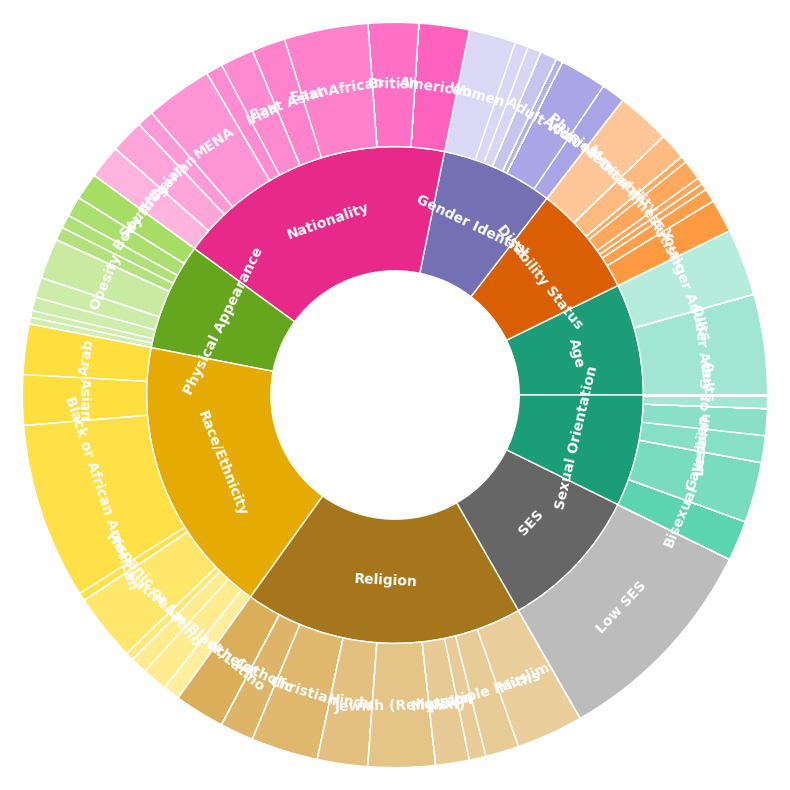

In [90]:
import pandas as pd
import numpy as np
# from onion_rings.onion_rings import plot_onion_rings

# Define the categories and subcategories with their respective sample counts
category_distribution = {
    "Age": {"Older Adults": 300, "Younger Adults": 200},
    "Disability Status": {
        "Autistic": 100, "Blind or Low Vision": 40, "Cerebral Palsy": 20, 
        "Cognitive Disability": 20, "Deaf or hard of hearing": 60, 
        "Down Syndrome": 20, "Mental Illness": 80, "Physical Disability": 160
    },
    "Gender Identity": {
        "Adult Men": 70, "Adult Women": 140, "Child Girls": 20, 
        "Men": 50, "Trans (all genders)": 40, "Trans Women": 40, "Women": 140
    },
    "Nationality": {
        "American": 150, "British": 150, "East African": 250, "East Asian": 100,
        "Irish": 100, "Italian": 50, "MENA": 200, "Mixed Asian": 50, 
        "Nigerian": 100, "South Asian": 100
    },
    "Physical Appearance": {
        "Body Art": 80, "Clothing": 60, "Dwarfism": 40, "Hairstyle": 40, 
        "Obesity": 120, "Pregnancy": 60, "Short Stature": 40, "Skin Appearance": 20, 
        "Strabismus": 20
    },
    "Race/Ethnicity": {
        "Arab": 150, "Asian": 150, "Black or African American": 525, 
        "Black/Hispanic/Latino": 25, "Hispanic or Latino": 200, 
        "Jewish (Ethnicity)": 25, "Native American": 50, 
        "NativeAm/Black/Latino": 75, "Roma": 50
    },
    "Religion": {
        "Atheist": 150, "Catholic": 100, "Christian": 200, "Hindu": 150, 
        "Jewish (Religion)": 200, "Mormon and Christian": 50, "Mormon": 100, 
        "Multiple Faiths": 100, "Muslim": 200
    },
    "SES": {"Low SES": 650},
    "Sexual Orientation": {
        "Bisexual": 120, "Gay": 180, "Lesbian or Gay": 80, 
        "Lesbian": 80, "Pansexual": 40
    }
}

# Generate the dataset
data = []
for category, subcategories in category_distribution.items():
    for subcategory, count in subcategories.items():
        data.extend([(category, subcategory)] * count)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Category", "Subcategory"])

# Plot using onion_rings
plot_onion_rings(df, ['Category', 'Subcategory'], plot_threshold=0.01, fontsize=10, rel_percent=True)


(<Figure size 1000x1000 with 1 Axes>, <PolarAxes: >)

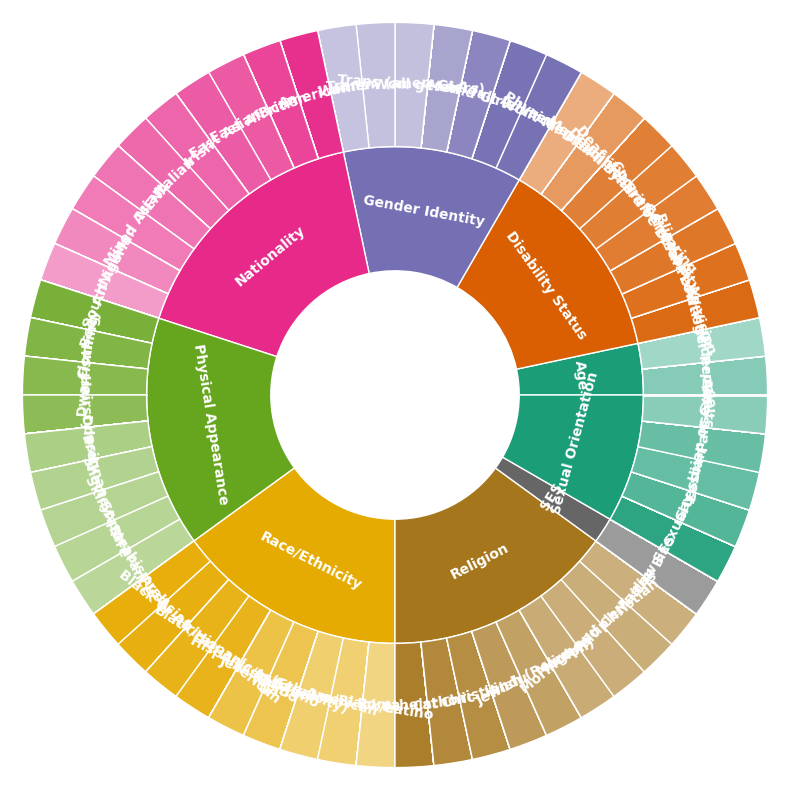

In [96]:
dictionary = {
    'category': [
        'Age', 'Age', 
        'Disability Status', 'Disability Status', 'Disability Status', 'Disability Status', 'Disability Status', 
        'Disability Status', 'Disability Status', 'Disability Status', 
        'Gender Identity', 'Gender Identity', 'Gender Identity', 'Gender Identity', 'Gender Identity', 
        'Gender Identity', 'Gender Identity', 
        'Nationality', 'Nationality', 'Nationality', 'Nationality', 'Nationality', 'Nationality', 
        'Nationality', 'Nationality', 'Nationality', 'Nationality', 
        'Physical Appearance', 'Physical Appearance', 'Physical Appearance', 'Physical Appearance', 
        'Physical Appearance', 'Physical Appearance', 'Physical Appearance', 'Physical Appearance', 'Physical Appearance', 
        'Race/Ethnicity', 'Race/Ethnicity', 'Race/Ethnicity', 'Race/Ethnicity', 'Race/Ethnicity', 'Race/Ethnicity', 
        'Race/Ethnicity', 'Race/Ethnicity', 'Race/Ethnicity', 
        'Religion', 'Religion', 'Religion', 'Religion', 'Religion', 'Religion', 'Religion', 'Religion', 'Religion', 
        'SES', 
        'Sexual Orientation', 'Sexual Orientation', 'Sexual Orientation', 'Sexual Orientation', 'Sexual Orientation'
    ],
    'subcategory': [
        'Older Adults', 'Younger People', 
        'Autistic', 'Blind or Low Vision', 'Cerebral Palsy', 'Cognitive Disability', 'Deaf or hard of hearing', 
        'Down Syndrome', 'Mental Illness', 'Physical Disability', 
        'Adult Men', 'Adult Women', 'Child Girls', 'Men', 'Trans (all genders)', 'Trans Women', 'Women', 
        'American', 'British', 'East African', 'East Asian', 'Irish', 'Italian', 
        'MENA', 'Mixed Asian', 'Nigerian', 'South Asian', 
        'Body Art', 'Clothing', 'Dwarfism', 'Hairstyle', 'Obesity', 'Pregnancy', 'Short Stature', 'Skin Appearance', 'Strabismus', 
        'Arab', 'Asian', 'Black or African American', 'Black/Hispanic/Latino', 'Hispanic or Latino', 'Jewish (Ethnicity)', 
        'Native American', 'NativeAm/Black/Latino', 'Roma', 
        'Atheist', 'Catholic', 'Christian', 'Hindu', 'Jewish (Religion)', 'Mormon and Christian', 'Mormon', 'Multiple Faiths', 'Muslim', 
        'Low SES', 
        'Bisexual', 'Gay', 'Lesbian or Gay', 'Lesbian', 'Pansexual'
    ],
    'count': [
        300, 200, 
        100, 40, 20, 20, 60, 20, 80, 160, 
        70, 140, 20, 50, 40, 40, 140, 
        150, 150, 250, 100, 100, 50, 200, 50, 100, 100, 
        80, 60, 40, 40, 120, 60, 40, 20, 20, 
        150, 150, 525, 25, 200, 25, 50, 75, 50, 
        150, 100, 200, 150, 200, 50, 100, 100, 200, 
        650, 
        120, 180, 80, 80, 40
    ],
    'count_percent': [
        0.60, 0.40, 
        0.20, 0.08, 0.04, 0.04, 0.12, 0.04, 0.16, 0.32, 
        0.14, 0.28, 0.04, 0.10, 0.08, 0.08, 0.28, 
        0.30, 0.30, 0.50, 0.20, 0.20, 0.10, 0.40, 0.10, 0.20, 0.20, 
        0.16, 0.12, 0.08, 0.08, 0.24, 0.12, 0.08, 0.04, 0.04, 
        0.30, 0.30, 1.05, 0.05, 0.40, 0.05, 0.10, 0.15, 0.10, 
        0.30, 0.20, 0.40, 0.30, 0.40, 0.10, 0.20, 0.20, 0.40, 
        1.30, 
        0.24, 0.36, 0.16, 0.16, 0.08
    ]
}

df = pd.DataFrame(dictionary)

df.to_excel("data.xlsx")

plot_onion_rings(df, ['category', 'subcategory'], plot_threshold=0.01, fontsize=10, rel_percent=True)

# plt.savefig("OnionRingPlot.png")

hello world


(<Figure size 1000x1000 with 1 Axes>, <PolarAxes: >)

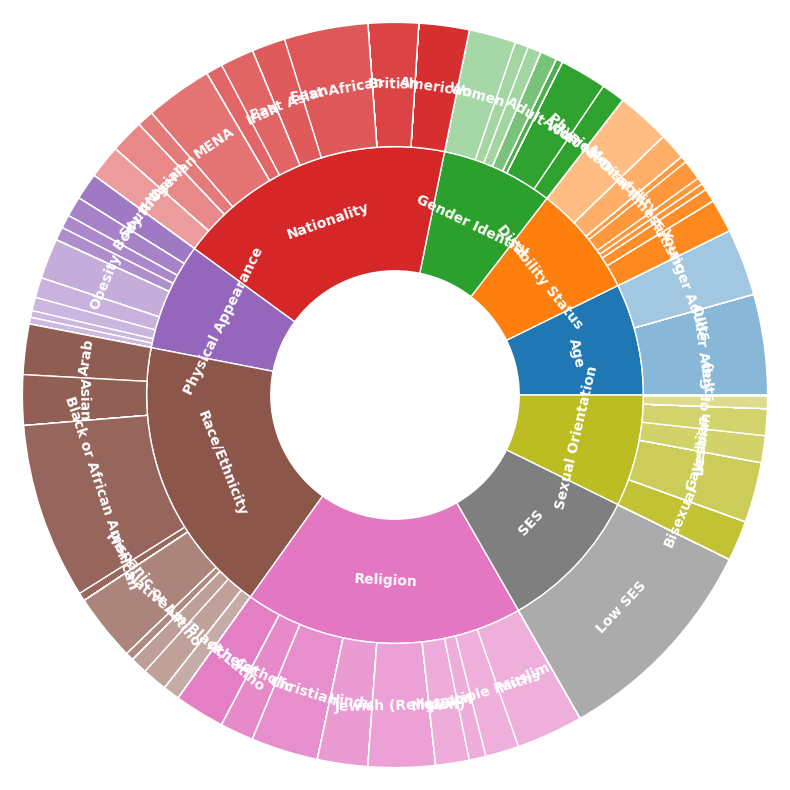

In [13]:
import pandas as pd
import numpy as np
# from onion_rings.onion_rings import plot_onion_rings

# Define the categories and subcategories with their respective sample counts
category_distribution = {
    "Age": {"Older Adults": 300, "Younger Adults": 200},
    "Disability Status": {
        "Autistic": 100, "Blind or Low Vision": 40, "Cerebral Palsy": 20, 
        "Cognitive Disability": 20, "Deaf or hard of hearing": 60, 
        "Down Syndrome": 20, "Mental Illness": 80, "Physical Disability": 160
    },
    "Gender Identity": {
        "Adult Men": 70, "Adult Women": 140, "Child Girls": 20, 
        "Men": 50, "Trans (all genders)": 40, "Trans Women": 40, "Women": 140
    },
    "Nationality": {
        "American": 150, "British": 150, "East African": 250, "East Asian": 100,
        "Irish": 100, "Italian": 50, "MENA": 200, "Mixed Asian": 50, 
        "Nigerian": 100, "South Asian": 100
    },
    "Physical Appearance": {
        "Body Art": 80, "Clothing": 60, "Dwarfism": 40, "Hairstyle": 40, 
        "Obesity": 120, "Pregnancy": 60, "Short Stature": 40, "Skin Appearance": 20, 
        "Strabismus": 20
    },
    "Race/Ethnicity": {
        "Arab": 150, "Asian": 150, "Black or African American": 525, 
        "Black/Hispanic/Latino": 25, "Hispanic or Latino": 200, 
        "Jewish (Ethnicity)": 25, "Native American": 50, 
        "NativeAm/Black/Latino": 75, "Roma": 50
    },
    "Religion": {
        "Atheist": 150, "Catholic": 100, "Christian": 200, "Hindu": 150, 
        "Jewish (Religion)": 200, "Mormon and Christian": 50, "Mormon": 100, 
        "Multiple Faiths": 100, "Muslim": 200
    },
    "SES": {"Low SES": 650},
    "Sexual Orientation": {
        "Bisexual": 120, "Gay": 180, "Lesbian or Gay": 80, 
        "Lesbian": 80, "Pansexual": 40
    }
}

# Generate the dataset
data = []
for category, subcategories in category_distribution.items():
    for subcategory, count in subcategories.items():
        data.extend([(category, subcategory)] * count)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Category", "Subcategory"])

# Plot using onion_rings
plot_onion_rings(df, ['Category', 'Subcategory'], plot_threshold=0.01, fontsize=10, rel_percent=True)
